In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets, preprocessing, ensemble

#import sklearn.ensemble

plt.style.use('ggplot')

In [2]:
housing = pd.read_csv('./data/Ames_HousePrice_withAddress_cleaned.csv')
housing.drop(['Unnamed: 0'], axis=1, inplace=True)


In [3]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
#dir(sklearn.ensemble)

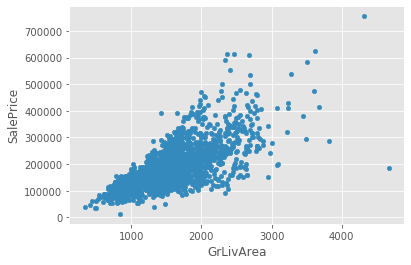

In [4]:
housing.plot.scatter(x='GrLivArea', y='SalePrice')

In [5]:
housing = housing[(housing['GrLivArea'] <= 4500)]

In [6]:
#sns.pairplot(housing)

In [7]:
housing.columns

Index(['GrLivArea', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea',
       'LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'GeoRefNo', 'Prop_Addr', 'lat',
       'long', 'Baths', 'Class_1.5story', 'Class_1story_dev', 'Class_2story',
       'Class_2story_dev', 'Class_duplex', 'Class_split', 'Lot_Corner',
       'Lot_CulDSac', 'Lot_FR', 'Foundation_Concrete', 'Foundation_Other',
       'price_per_s

In [8]:
X = housing[['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
            'YearBuilt', 'ExterQual', 'BsmtFinSF1', 'ScreenPorch',
            'TotalBsmtSF', 'KitchenQual', 'Fireplaces', 'GarageArea',
            'WoodDeckSF', 'MasVnrArea']]

y = np.log(housing['SalePrice'])

In [9]:
X.isna().sum()

GrLivArea      0
LotFrontage    0
LotArea        0
OverallQual    0
OverallCond    0
YearBuilt      0
ExterQual      0
BsmtFinSF1     1
ScreenPorch    0
TotalBsmtSF    1
KitchenQual    0
Fireplaces     0
GarageArea     1
WoodDeckSF     0
MasVnrArea     0
dtype: int64

In [10]:
X = X.fillna(0)

In [11]:
y.isna().sum()

0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
gbm = GradientBoostingRegressor()

In [14]:
# gbm.fit(X_train,y_train)
# print('-'*50)
# print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
# print("The test set R^2 is %.3f" %(gbm.score(X_test, y_test)))

In [15]:
# model = gbm.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [16]:
# from sklearn.metrics import r2_score
# r2_score(y_pred, y_test)

# Model Parameters


In [17]:
gbm.set_params(n_estimators=1000, warm_start=False, verbose = 1)
gbm.fit(X_train,y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test, y_test)))

      Iter       Train Loss   Remaining Time 
         1           0.1259            3.02s
         2           0.1096            2.51s
         3           0.0960            2.66s
         4           0.0847            2.74s
         5           0.0751            2.79s
         6           0.0664            2.82s
         7           0.0590            2.70s
         8           0.0528            2.73s
         9           0.0475            2.75s
        10           0.0429            2.67s
        20           0.0200            2.60s
        30           0.0131            2.55s
        40           0.0103            2.54s
        50           0.0090            2.51s
        60           0.0082            2.48s
        70           0.0077            2.44s
        80           0.0074            2.41s
        90           0.0072            2.41s
       100           0.0070            2.38s
       200           0.0053            2.09s
       300           0.0043            1.82s
       40

In [18]:
from sklearn.metrics import r2_score

gen_train = gbm.staged_predict(X_train)
gen_test  = gbm.staged_predict(X_test)

trainR2 = []
testR2  = []
steps   = range(1,1000)
for n in steps:
    y_pred_train = next(gen_train)
    y_pred_test  = next(gen_test)
    trainR2.append(r2_score(y_pred_train, y_train))
    testR2.append(r2_score(y_pred_test, y_test))

Text(0, 0.5, '$R^2$')

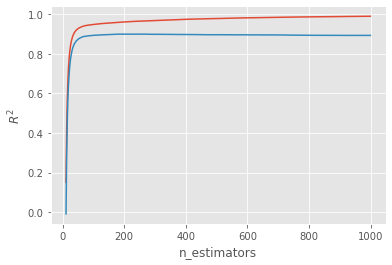

In [19]:
start = 10
end   = 1000
plt.plot(steps[start:end], trainR2[start:end],label='train')
plt.plot(steps[start:end], testR2[start:end],label='test')
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')

In [20]:
# LR = {'n_estimators':[70, 75, 80, 90, 100, 125, 150, 250, 300], \
#       'max_depth':[1,2,3,4,5], 'max_features': [1, 2, 3, 4, 5]}

# tuning = GridSearchCV(estimator = GradientBoostingRegressor(),
#                      param_grid = LR, scoring = 'r2')

# tuning.fit(X_train, y_train)
# tuning.best_params_, tuning.best_score_

In [21]:
gbm.set_params(learning_rate=0.1, n_estimators=150, max_depth=2, max_features=4, subsample=.8, warm_start=False)
gbm.fit(X_train, y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test, y_test)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1331           0.0123            0.15s
         2           0.1145           0.0139            0.15s
         3           0.1119           0.0098            0.15s
         4           0.0989           0.0092            0.15s
         5           0.0882           0.0086            0.15s
         6           0.0828           0.0079            0.12s
         7           0.0715           0.0086            0.12s
         8           0.0659           0.0064            0.12s
         9           0.0636           0.0055            0.13s
        10           0.0588           0.0042            0.13s
        20           0.0293           0.0014            0.10s
        30           0.0204           0.0006            0.09s
        40           0.0165           0.0004            0.08s
        50           0.0154           0.0001            0.07s
        60           0.0128           0.0001            0.07s
       

Text(0, 0.5, '$R^2$')

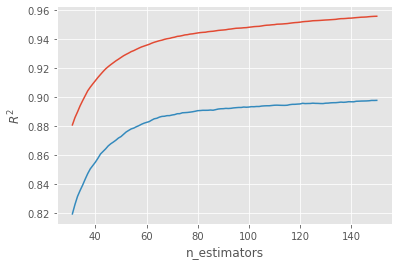

In [22]:
start = 30
end   = 150
plt.plot(steps[start:end], trainR2[start:end],label='train')
plt.plot(steps[start:end], testR2[start:end],label='test')
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')

In [23]:
gbm.set_params(learning_rate=0.09, n_estimators=100, max_depth=2, max_features=2, subsample=.8, warm_start=False)
gbm.fit(X_train, y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test, y_test)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1402           0.0094            0.10s
         2           0.1225           0.0128            0.10s
         3           0.1123           0.0111            0.10s
         4           0.1029           0.0092            0.07s
         5           0.0958           0.0070            0.08s
         6           0.0919           0.0058            0.08s
         7           0.0829           0.0058            0.08s
         8           0.0786           0.0058            0.07s
         9           0.0702           0.0046            0.07s
        10           0.0674           0.0048            0.07s
        20           0.0388           0.0015            0.06s
        30           0.0268           0.0011            0.04s
        40           0.0209           0.0003            0.04s
        50           0.0183           0.0001            0.03s
        60           0.0156           0.0001            0.02s
       

In [24]:
gbm.fit(X, y)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1399           0.0092            0.10s
         2           0.1186           0.0151            0.10s
         3           0.1115           0.0104            0.10s
         4           0.1038           0.0093            0.10s
         5           0.0985           0.0070            0.10s
         6           0.0900           0.0076            0.08s
         7           0.0819           0.0078            0.08s
         8           0.0791           0.0057            0.08s
         9           0.0750           0.0042            0.08s
        10           0.0691           0.0053            0.08s
        20           0.0410           0.0015            0.06s
        30           0.0261           0.0014            0.05s
        40           0.0212           0.0006            0.04s
        50           0.0182           0.0002            0.03s
        60           0.0167           0.0001            0.03s
       

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.09, loss='ls', max_depth=2,
                          max_features=2, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [25]:
gbm.score(X, y)

0.9079023960389085

In [26]:
importance = sorted(list(zip(X.columns, list(gbm.feature_importances_))), key=lambda t:t[1], reverse=True)

Text(0.5, 1.0, 'feature importance of a gbm classifier')

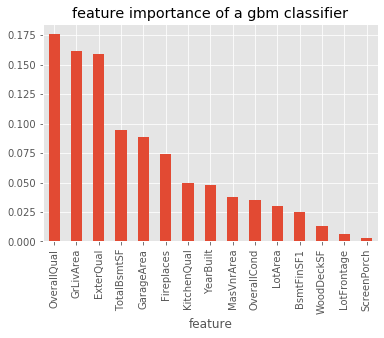

In [27]:
a, b = zip(*importance)
importance_score = pd.DataFrame({'feature':a, 'score':b})
importance_score.plot.bar(x='feature', y='score', legend=None)
plt.title('feature importance of a gbm classifier')

# Normalize Data 

In [28]:
data = X.copy()

In [29]:
#data_l1 = preprocessing.normalize(data, norm='l1') 
data_l2 = preprocessing.normalize(data, norm='l2')

print('L1-normalized data : \n' , data_l1)
print('\nL2-normalized data : \n' , data_l2)

L1-normalized data : 
 [[0.06923886 0.         0.63819461 ... 0.03227372 0.         0.        ]
 [0.11226455 0.00449486 0.45323202 ... 0.02846747 0.         0.01594606]
 [0.09085958 0.00544613 0.550059   ... 0.01960606 0.0139784  0.        ]
 ...
 [0.1604681  0.00657262 0.50256492 ... 0.06981404 0.         0.        ]
 [0.12009388 0.         0.57543356 ... 0.03168601 0.01258313 0.00938845]
 [0.12333011 0.00516296 0.616586   ... 0.0303969  0.01174572 0.00806712]]

L2-normalized data : 
 [[0.10401902 0.         0.95877348 ... 0.0484855  0.         0.        ]
 [0.21205212 0.00849017 0.85609221 ... 0.05377108 0.         0.03011989]
 [0.15306392 0.00917466 0.92664072 ... 0.03302878 0.0235483  0.        ]
 ...
 [0.28609458 0.01171816 0.89601051 ... 0.12446972 0.         0.        ]
 [0.19718527 0.         0.94481933 ... 0.05202608 0.02066056 0.01541514]
 [0.19116871 0.00800288 0.95574352 ... 0.04711694 0.01820654 0.01250449]]


In [30]:
gbm_norm = GradientBoostingRegressor()

In [31]:
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(data_l2, y, test_size=0.2)

In [46]:
gbm_norm.set_params(n_estimators=1000, warm_start=False, verbose = 1)
gbm_norm.fit(X_norm_train, y_norm_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm_norm.score(X_norm_train, y_norm_train)))
print("The test set R^2 is %.3f" %(gbm_norm.score(X_norm_test, y_norm_test)))

      Iter       Train Loss   Remaining Time 
         1           0.1363            3.99s
         2           0.1255            4.51s
         3           0.1166            4.33s
         4           0.1090            4.48s
         5           0.1016            4.38s
         6           0.0959            4.48s
         7           0.0912            4.54s
         8           0.0865            4.47s
         9           0.0823            4.51s
        10           0.0785            4.45s
        20           0.0490            4.36s
        30           0.0351            4.30s
        40           0.0279            4.25s
        50           0.0240            4.20s
        60           0.0208            4.15s
        70           0.0186            4.09s
        80           0.0170            4.05s
        90           0.0156            4.00s
       100           0.0144            3.96s
       200           0.0091            3.52s
       300           0.0067            3.08s
       40

In [47]:
gen_norm_train = gbm_norm.staged_predict(X_train)
gen_norm_test  = gbm_norm.staged_predict(X_test)

trainR2 = []
testR2  = []
steps   = range(1,1000)
for n in steps:
    y_norm_pred_train = next(gen_norm_train)
    y_norm_pred_test  = next(gen_norm_test)
    trainR2.append(r2_score(y_norm_pred_train, y_norm_train))
    testR2.append(r2_score(y_norm_pred_test, y_norm_test))

Text(0, 0.5, '$R^2$')

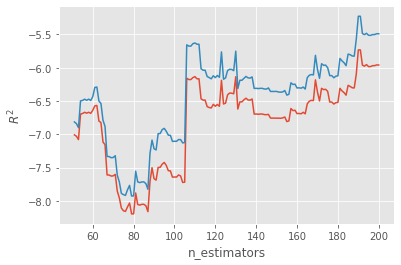

In [49]:
start = 50
end   = 200
plt.plot(steps[start:end], trainR2[start:end],label='train')
plt.plot(steps[start:end], testR2[start:end],label='test')
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')


In [69]:
gbm_norm.set_params(learning_rate=0.1, n_estimators=125, max_depth=2, max_features=3, subsample=.8, warm_start=False)
gbm_norm.fit(X_train, y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm_norm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm_norm.score(X_test, y_test)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1319           0.0156            0.00s
         2           0.1161           0.0114            0.06s
         3           0.1062           0.0110            0.08s
         4           0.0934           0.0103            0.09s
         5           0.0866           0.0094            0.10s
         6           0.0820           0.0061            0.08s
         7           0.0693           0.0069            0.08s
         8           0.0671           0.0055            0.09s
         9           0.0646           0.0040            0.09s
        10           0.0585           0.0049            0.09s
        20           0.0319           0.0014            0.08s
        30           0.0233           0.0006            0.07s
        40           0.0168           0.0002            0.06s
        50           0.0156           0.0002            0.05s
        60           0.0129           0.0000            0.05s
       

In [70]:
gbm_norm.fit(X, y)
print("The R^2 is %.3f" %(gbm_norm.score(X, y)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1327           0.0125            0.25s
         2           0.1172           0.0139            0.19s
         3           0.1080           0.0105            0.16s
         4           0.0976           0.0113            0.15s
         5           0.0918           0.0082            0.14s
         6           0.0852           0.0081            0.14s
         7           0.0782           0.0058            0.13s
         8           0.0682           0.0064            0.13s
         9           0.0659           0.0054            0.13s
        10           0.0613           0.0043            0.13s
        20           0.0348           0.0016            0.10s
        30           0.0222           0.0008            0.09s
        40           0.0177           0.0003            0.07s
        50           0.0157           0.0001            0.06s
        60           0.0141           0.0001            0.05s
       